# Principal Component Analysis Demonstration

Importing the Necessary Libraries and dataset

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

# Load the dataset
file_path = r"C:\Users\Owner\Desktop\PCA\indicater_52.csv"
dataset = pd.read_csv(file_path)

Extracting the features in the dataset from the csv file and preprocessing the data

In [2]:
# Extract the features (X) and target variable (y)
X = dataset.iloc[:, 3:11].values
y = dataset.iloc[:, 11].values

# Impute missing values with the mean
imputer = SimpleImputer(strategy='mean')
X = imputer.fit_transform(X)

# Perform preprocessing
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

We'll perform eigenvalue decomposition  to see components and select the valid ones for PCA 

In [3]:
# To calculate the eigenvalue, you Calculate the covariance matrix to avoid shape error
cov_matrix = np.cov(X_scaled, rowvar=False)

# Perform eigenvalue decomposition
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)
print('Eigen values:\n', eigenvalues)
print('Eigen values Shape:', eigenvalues.shape)
print('Eigen Vector Shape:', eigenvectors.shape)

# Sort eigenvalues and eigenvectors in descending order
sorted_indices = np.argsort(eigenvalues)[::-1]
eigenvalues = eigenvalues[sorted_indices]
eigenvectors = eigenvectors[:, sorted_indices]

Eigen values:
 [5.1438941  1.13221545 1.03658709 0.45676503 0.25739823 0.02048971
 0.05932883 0.0387761 ]
Eigen values Shape: (8,)
Eigen Vector Shape: (8, 8)


Run PCA using the valid components seen from the eigenvalue decomposition

In [4]:
# Perform PCA
num_components = 3
pca = PCA(n_components=num_components)
principal_components = pca.fit_transform(X_scaled)

# Create a DataFrame to store the principal components
pca_df = pd.DataFrame(data=principal_components, columns=[f'PC{i+1}' for i in range(num_components)])

# You can access the loadings (coefficients) of each original feature on the principal components
loadings = pca.components_[:3]
print("Loadings:\n", loadings)

Loadings:
 [[ 0.41129311  0.42354825  0.40967555  0.24808147  0.36077761  0.41208975
  -0.34458757  0.05785632]
 [-0.23547317 -0.1082218  -0.22385342 -0.03839958  0.20190802  0.1763715
  -0.13623176  0.88928212]
 [ 0.16961919 -0.12862448  0.15599397  0.77302295 -0.46346135 -0.17038667
   0.14143207  0.2625936 ]]


Visualize the PCA 

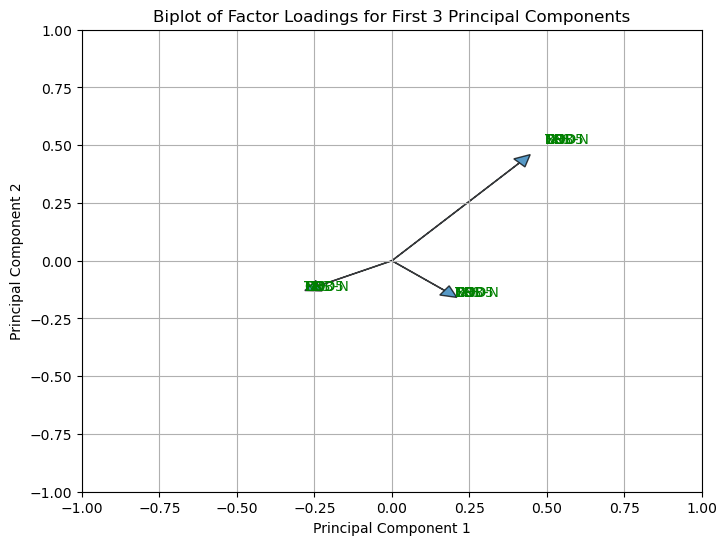

In [5]:
# Biplot to visualize factor loadings for the first 3 principal components
plt.figure(figsize=(8, 6))
for i in range(3):
    plt.arrow(0, 0, loadings[i, 0], loadings[i, 1], head_width=0.05, head_length=0.05, alpha=0.75)
    for j, feature in enumerate(dataset.columns[3:10]):
        plt.text(loadings[i, 0] * 1.2, loadings[i, 1] * 1.2, feature, color='g')

plt.xlim(-1, 1)
plt.ylim(-1, 1)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Biplot of Factor Loadings for First 3 Principal Components')
plt.grid()
plt.show()

Other forms of analysis

In [6]:
# Component Matrix (Loadings Matrix)
component_matrix = pca.components_.T
print("Component Matrix (Loadings Matrix):\n", component_matrix)
print("\n")

# Component Score Coefficients (Transformation Matrix)
component_score_coefficients = pca.components_[:3].T
print("Component Score Coefficients (Transformation Matrix):\n", component_score_coefficients)
print("\n")

# Component Score Covariance
component_score_covariance = pca.get_covariance()
print("Component Score Covariance:\n", component_score_covariance)

Component Matrix (Loadings Matrix):
 [[ 0.41129311 -0.23547317  0.16961919]
 [ 0.42354825 -0.1082218  -0.12862448]
 [ 0.40967555 -0.22385342  0.15599397]
 [ 0.24808147 -0.03839958  0.77302295]
 [ 0.36077761  0.20190802 -0.46346135]
 [ 0.41208975  0.1763715  -0.17038667]
 [-0.34458757 -0.13623176  0.14143207]
 [ 0.05785632  0.88928212  0.2625936 ]]


Component Score Coefficients (Transformation Matrix):
 [[ 0.41129311 -0.23547317  0.16961919]
 [ 0.42354825 -0.1082218  -0.12862448]
 [ 0.40967555 -0.22385342  0.15599397]
 [ 0.24808147 -0.03839958  0.77302295]
 [ 0.36077761  0.20190802 -0.46346135]
 [ 0.41208975  0.1763715  -0.17038667]
 [-0.34458757 -0.13623176  0.14143207]
 [ 0.05785632  0.88928212  0.2625936 ]]


Component Score Covariance:
 [[ 1.08710415e+00  8.72691987e-01  9.12588262e-01  6.30669403e-01
   6.24258053e-01  7.78358648e-01 -6.53572032e-01 -4.50194730e-02]
 [ 8.72691987e-01  1.08515647e+00  8.69592379e-01  4.40497271e-01
   7.91335798e-01  8.69380578e-01 -7.28030793e-01 